In [5]:
import pandas as pd
import requests
import plotly.express as px
from bs4 import BeautifulSoup

In [6]:
url = 'https://www.tsa.gov/coronavirus/passenger-throughput'
req = requests.get(url)

data = req.text
soup = BeautifulSoup(req.content, 'lxml')

In [7]:
table = soup.find_all('table')[0]
df = pd.read_html(str(table))[0]

df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

display(df)

Total Traveler Throughput  \
Date                                    
2021-01-01                     805990   
2020-12-31                     874406   
2020-12-30                    1163696   
2020-12-29                    1019347   
2020-12-28                    1111751   
...                               ...   
2020-06-20                     507129   
2020-06-19                     587908   
2020-06-18                     576514   
2020-06-17                     441829   
2020-06-16                     417924   

            Total Traveler Throughput (1 Year Ago - Same Weekday)  
Date                                                               
2021-01-01                                            2311732      
2020-12-31                                            2392331      
2020-12-30                                            2133253      
2020-12-29                                            2009880      
2020-12-28                                            2500396      
...                                                       ...      
2020-06-20                                            2378559      
2020-06-19                                            2772903      
2020-06-18                                            2728786      
2020-06-17                                            2552395      
2020-06-16                                            2466574      

[200 rows x 2 columns]

In [8]:
df = df.rename(columns={'Total Traveler Throughput':'Present',
                        'Total Traveler Throughput (1 Year Ago - Same Weekday)':'One Year Ago'})

df['Difference in Travelers'] = df['Present'].sub(df['One Year Ago'])

display(df)

Present  One Year Ago  Difference in Travelers
Date                                                      
2021-01-01   805990       2311732                 -1505742
2020-12-31   874406       2392331                 -1517925
2020-12-30  1163696       2133253                  -969557
2020-12-29  1019347       2009880                  -990533
2020-12-28  1111751       2500396                 -1388645
...             ...           ...                      ...
2020-06-20   507129       2378559                 -1871430
2020-06-19   587908       2772903                 -2184995
2020-06-18   576514       2728786                 -2152272
2020-06-17   441829       2552395                 -2110566
2020-06-16   417924       2466574                 -2048650

[200 rows x 3 columns]

In [9]:
df['% Difference in Travelers'] = df['Present'].sub(df['One Year Ago']).div(df['One Year Ago'])

display(df)

Present  One Year Ago  Difference in Travelers  \
Date                                                         
2021-01-01   805990       2311732                 -1505742   
2020-12-31   874406       2392331                 -1517925   
2020-12-30  1163696       2133253                  -969557   
2020-12-29  1019347       2009880                  -990533   
2020-12-28  1111751       2500396                 -1388645   
...             ...           ...                      ...   
2020-06-20   507129       2378559                 -1871430   
2020-06-19   587908       2772903                 -2184995   
2020-06-18   576514       2728786                 -2152272   
2020-06-17   441829       2552395                 -2110566   
2020-06-16   417924       2466574                 -2048650   

            % Difference in Travelers  
Date                                   
2021-01-01                  -0.651348  
2020-12-31                  -0.634496  
2020-12-30                  -0.454497  
2020-12-29                  -0.492832  
2020-12-28                  -0.555370  
...                               ...  
2020-06-20                  -0.786791  
2020-06-19                  -0.787981  
2020-06-18                  -0.788729  
2020-06-17                  -0.826896  
2020-06-16                  -0.830565  

[200 rows x 4 columns]

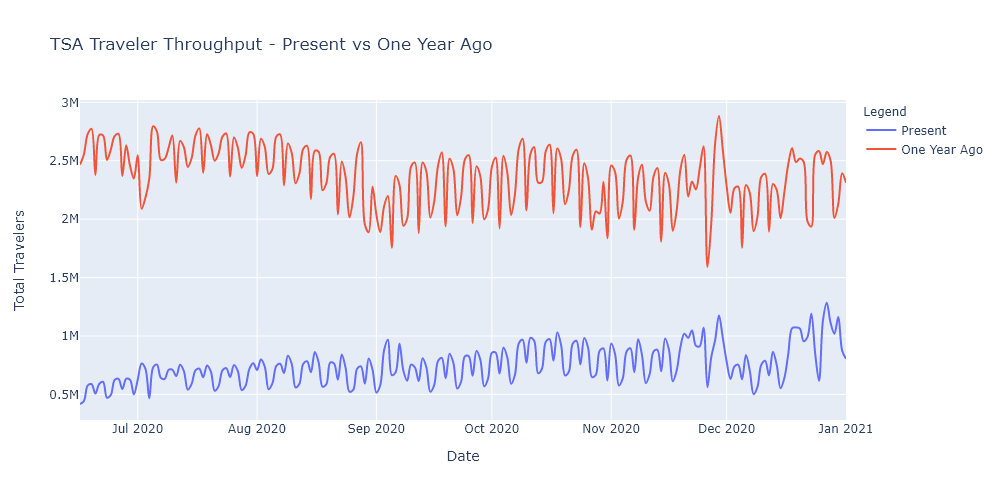

In [13]:
fig = px.line(df, y=['Present',
                     'One Year Ago'],
              line_shape='spline',
              title='TSA Traveler Throughput - Present vs One Year Ago',
              labels={'value':'Total Travelers',
                      'variable':'Legend'},)

fig.show(renderer="png", height=500, width=1000)